In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from matplotlib import rcParams
pd.set_option('display.max_columns', None)


rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
data = pd.read_csv('train.csv', sep=';')

# Dokumentasi & Catatan

## 01. Info Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 02. Pengelompokan Dataset

In [5]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job','marital','education','default','housing','loan','contact','poutcome','y']
nums = ['age','balance','duration','campaign','pdays','previous']
timestamp = ['day','month']

## 03. Sample / Describe

In [6]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35344,31,technician,married,secondary,no,504,yes,yes,cellular,7,may,52,2,-1,0,unknown,no
25796,39,management,married,secondary,no,763,no,no,cellular,19,nov,360,1,153,2,other,no
13249,38,blue-collar,single,secondary,no,10,no,no,cellular,8,jul,84,3,-1,0,unknown,no
24490,35,entrepreneur,married,secondary,no,24,yes,no,cellular,17,nov,128,1,181,1,failure,no
2899,55,management,married,tertiary,no,23189,yes,no,unknown,14,may,77,1,-1,0,unknown,no
26213,41,blue-collar,married,primary,no,2562,yes,no,cellular,20,nov,157,1,189,4,failure,no
12769,54,management,divorced,tertiary,no,92,no,yes,telephone,7,jul,86,4,-1,0,unknown,no
26147,52,management,single,tertiary,no,638,yes,yes,cellular,20,nov,77,2,-1,0,unknown,no
28822,57,management,divorced,tertiary,no,2549,no,no,cellular,30,jan,456,3,197,2,failure,no
2130,41,self-employed,married,secondary,no,304,yes,no,unknown,12,may,1147,2,-1,0,unknown,no


In [7]:
data[nums].describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data[cats].describe()

,job,marital,education,default,housing,loan,contact,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,36959,39922


## 04. Adjustment Dataset

In [9]:
data['pdays'] = data['pdays'].replace(-1, 0)

In [10]:
data[nums].describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,41.015195,0.580323
std,10.618762,3044.765829,257.527812,3.098021,99.792615,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


# Data Cleansing

## a. Handle Missing Value

In [11]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## b. Handle Duplicated Data

In [12]:
data.duplicated().sum()

0

In [13]:
# Info Setelah di handle duplicate
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## c. Handle Outlier

### - Outlier Checking (Numerik)

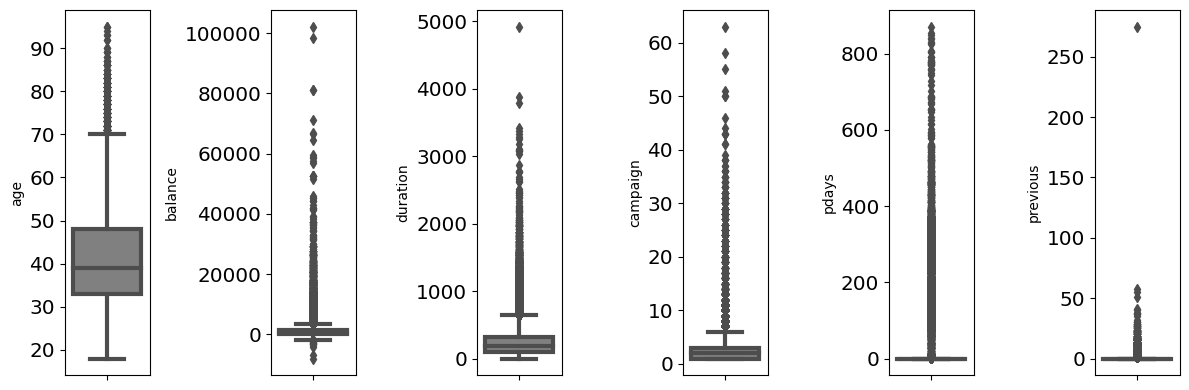

In [14]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()
    
plt.show()

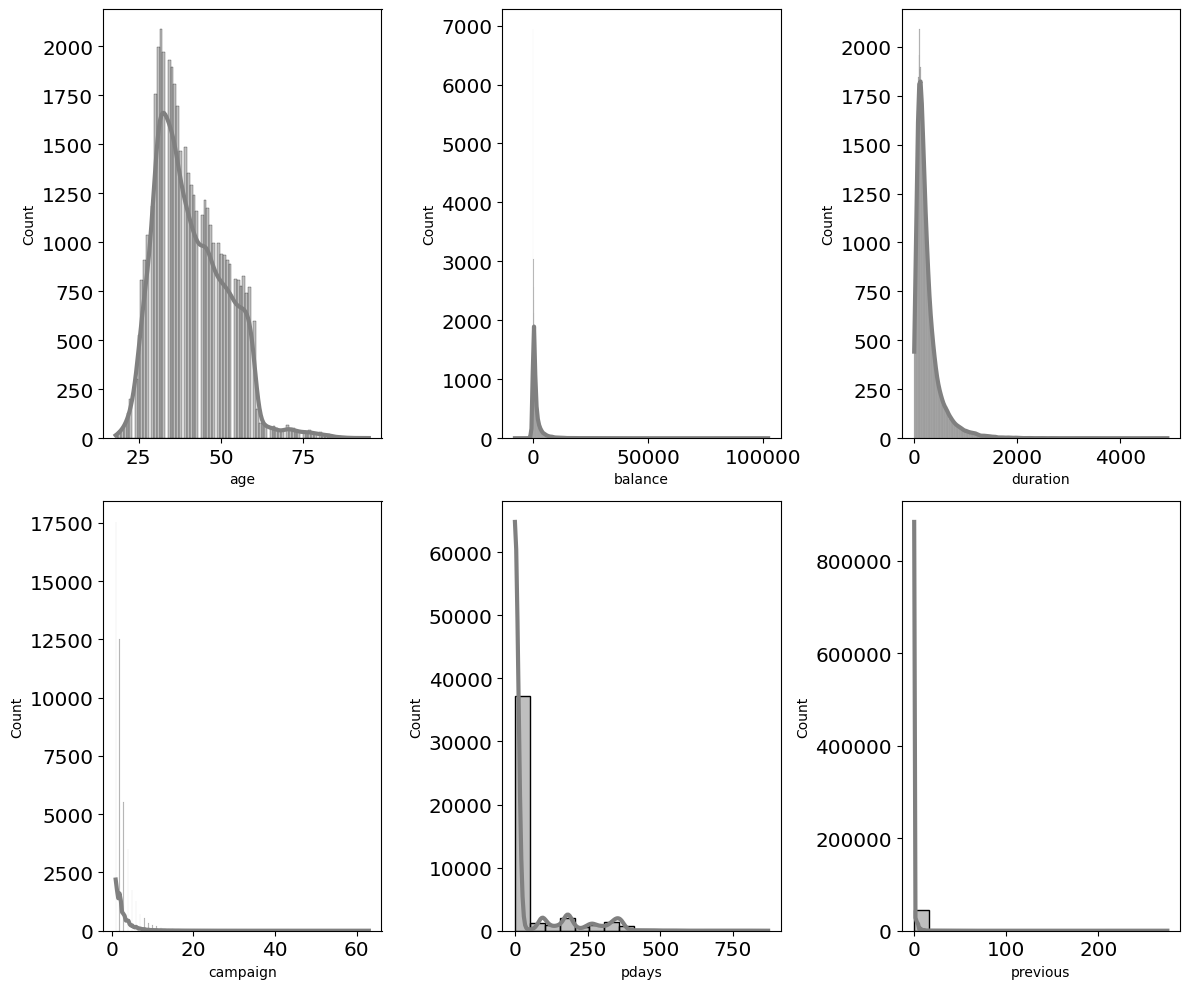

In [15]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

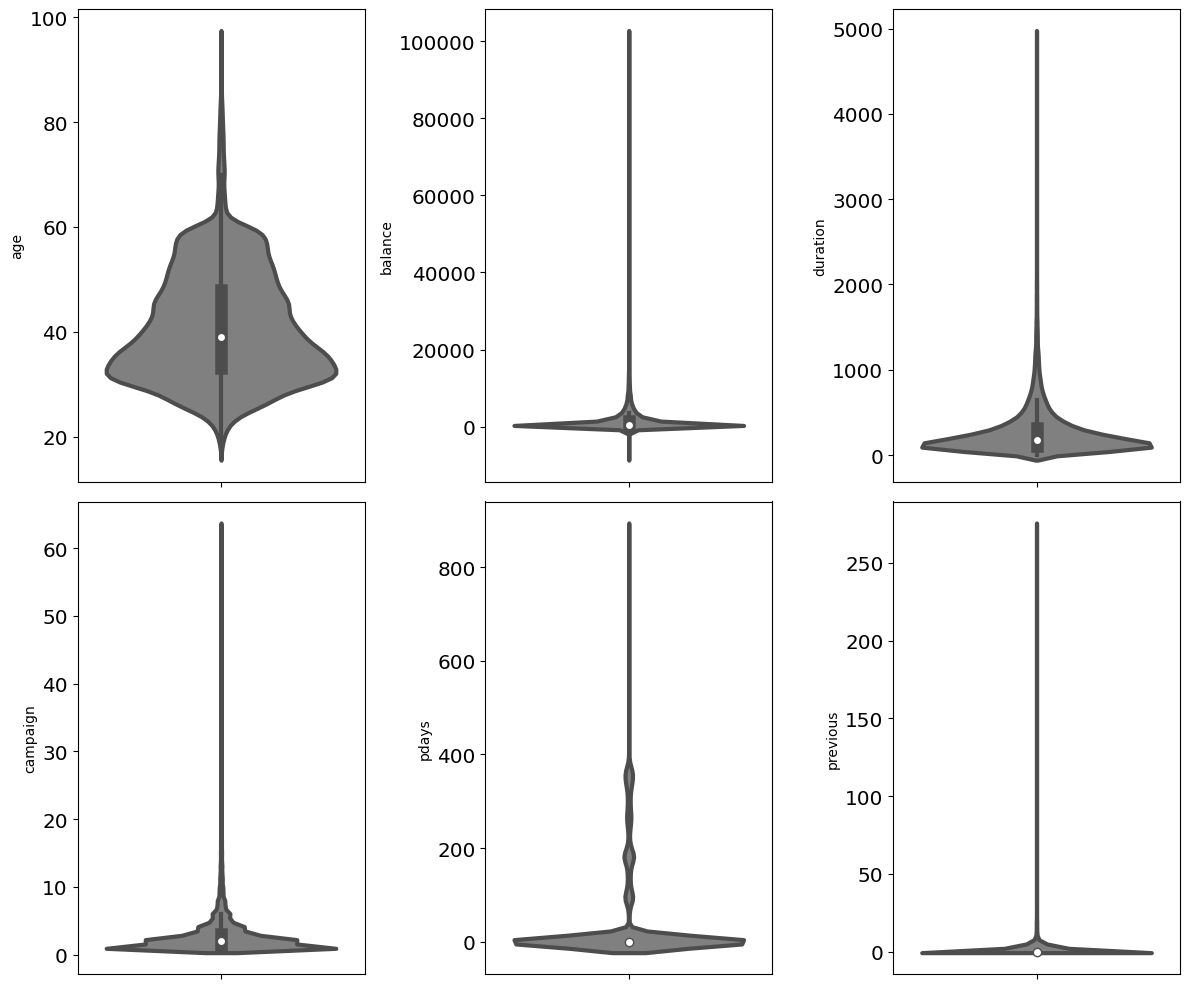

In [16]:
plt.figure(figsize=(12, 10))
num_columns = 3

for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

### - Outlier Checking (Kategori)

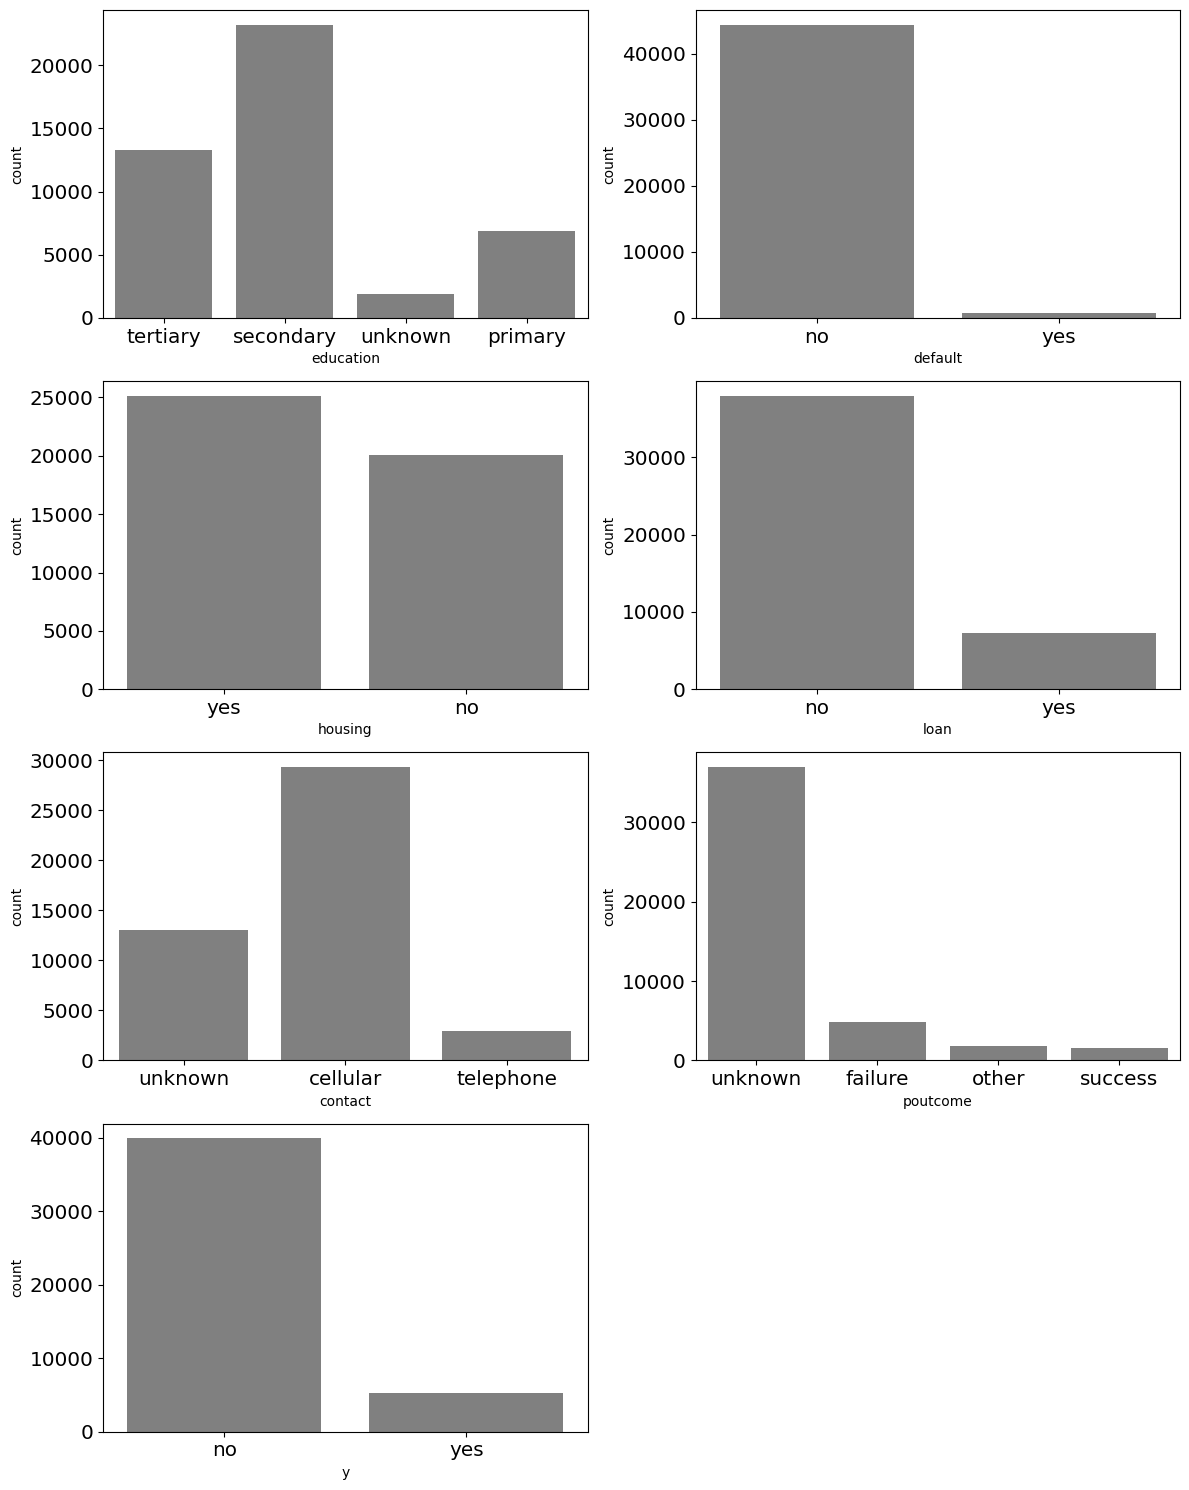

In [17]:
plt.figure(figsize=(12, 15))
num_columns = 2

for i in range(0, len(cats[2:])):
    plt.subplot(4, num_columns, i+1)
    sns.countplot(x=data[cats[2:][i]], color='gray', orient='h')
    plt.tight_layout()

### - Outlier Checking (timestamp)

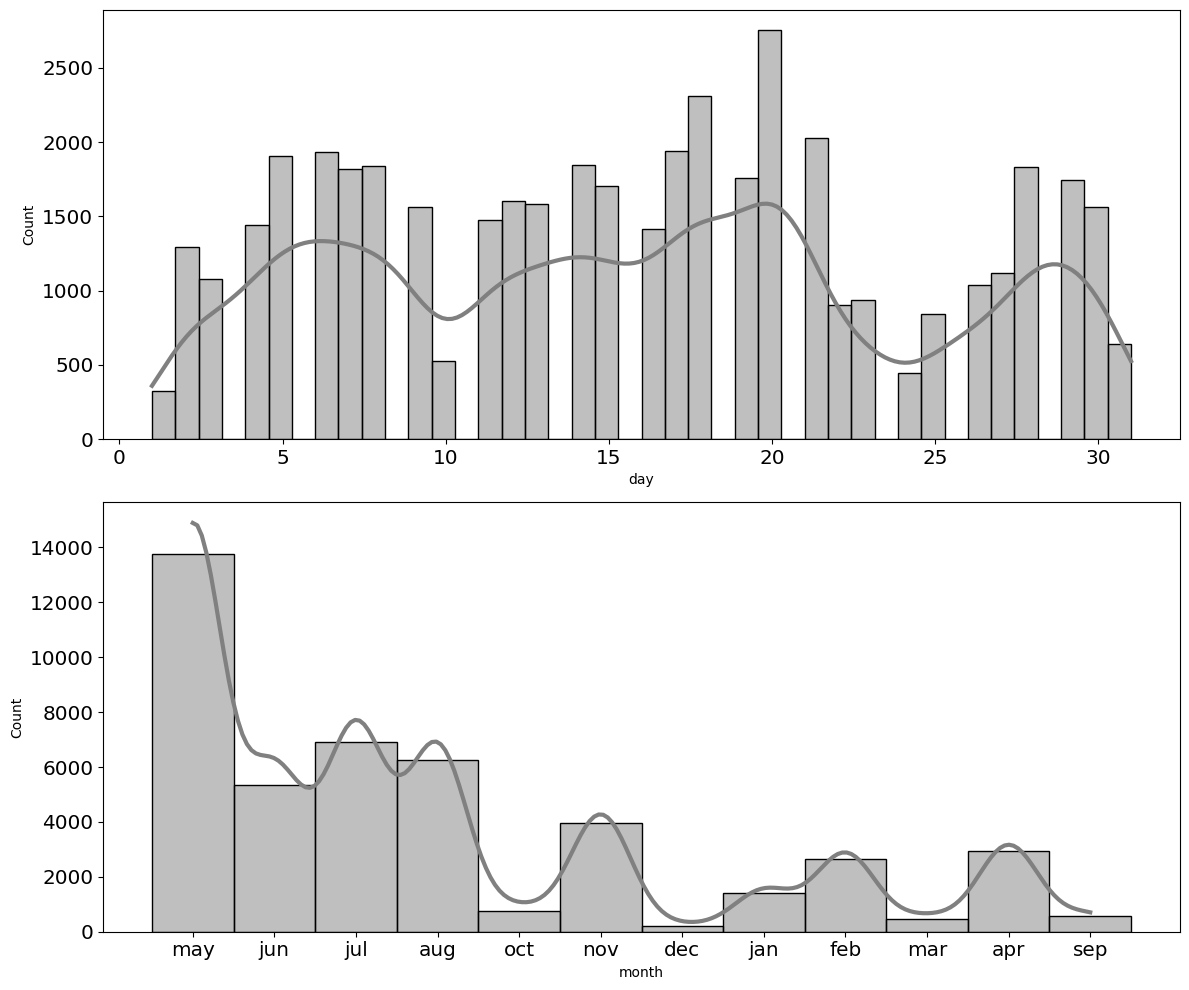

In [18]:
plt.figure(figsize=(12, 10))
num_columns = 1
for i in range(0, len(timestamp)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[timestamp[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with IQR

In [19]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in ['age','balance','duration','campaign']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries

data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 34719


### - After Cleansing IQR

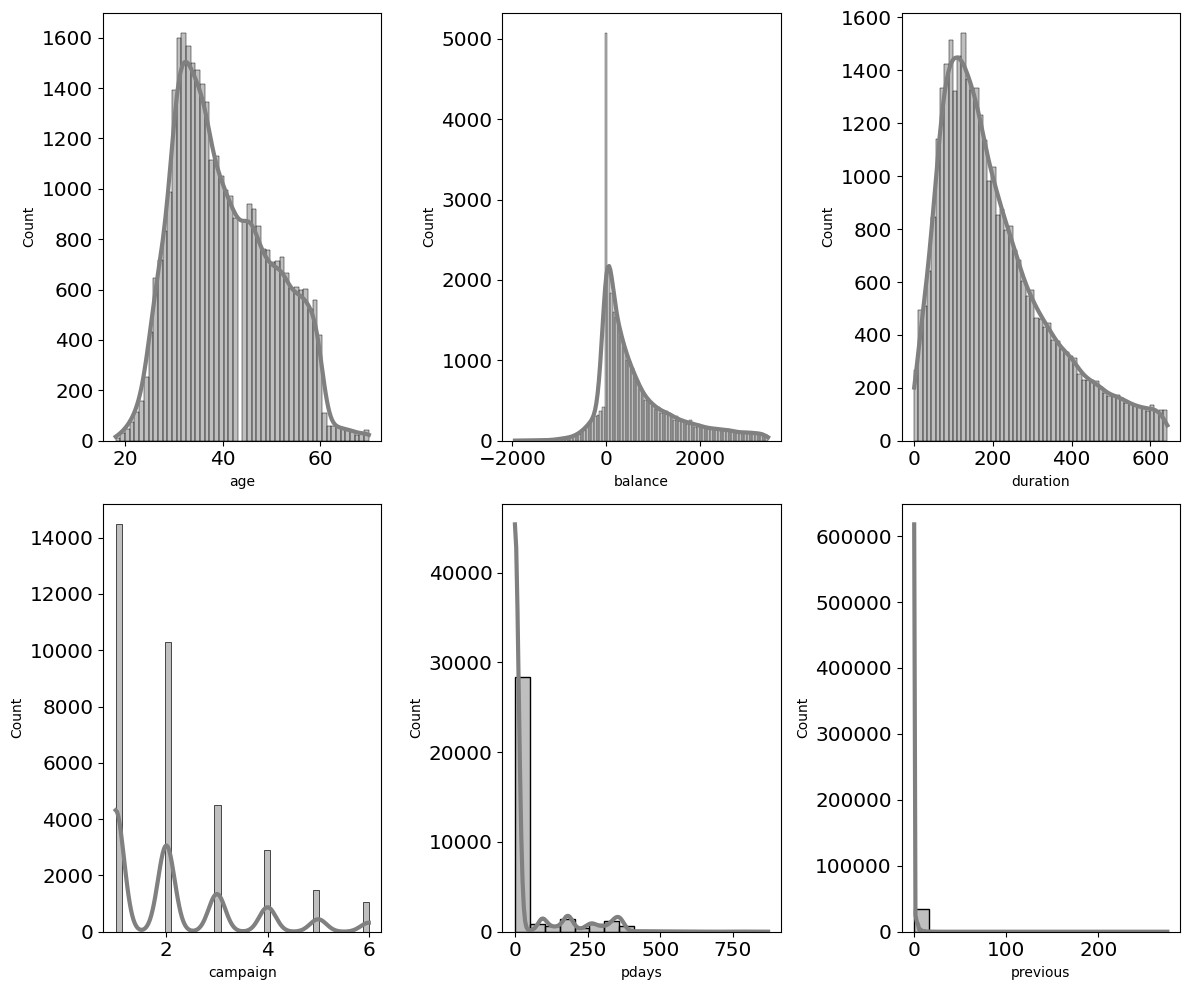

In [20]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with Z - Score

In [21]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

z_score_threshold = 2

filtered_entries = np.array([True] * len(data))
for col in ['pdays', 'previous']:
    mean_col = data[col].mean()
    std_col = data[col].std()
    z_scores = (data[col] - mean_col) / std_col
    
    # Menyaring entri berdasarkan threshold Z-score
    filtered_entries = (np.abs(z_scores) <= z_score_threshold) & filtered_entries

# Menyaring data
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 34719
Jumlah baris setelah memfilter outlier: 31283


### - Distribusi hasil IQR + Z - Score 

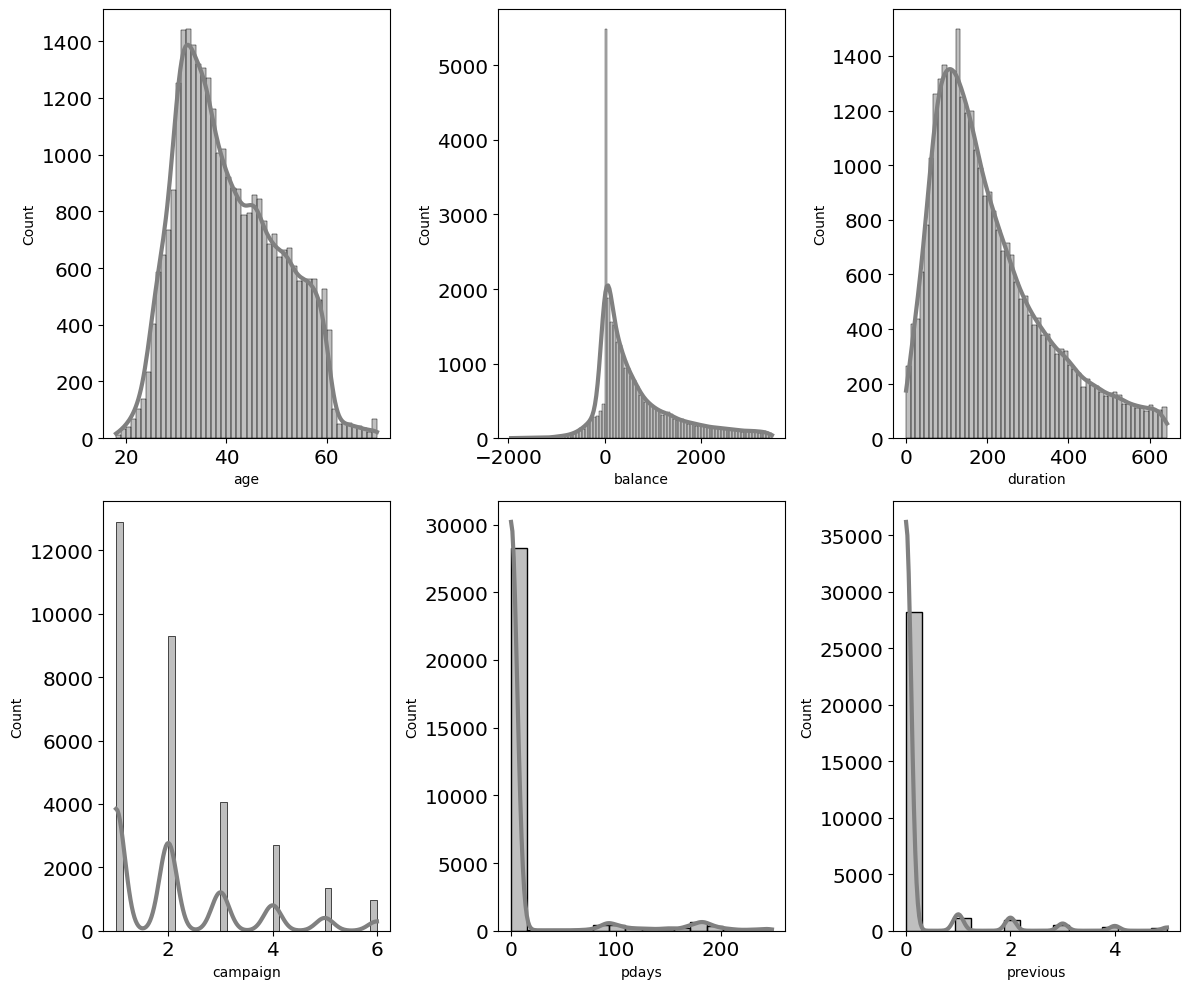

In [22]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

## d. Feature Transformation

In [23]:
for col in nums:
    # menambahkan nilai kecil untuk menghindari log(0) atau log(negatif)
    data[col + '_log'] = np.log1p(np.abs(data[col]) + 1e-9)

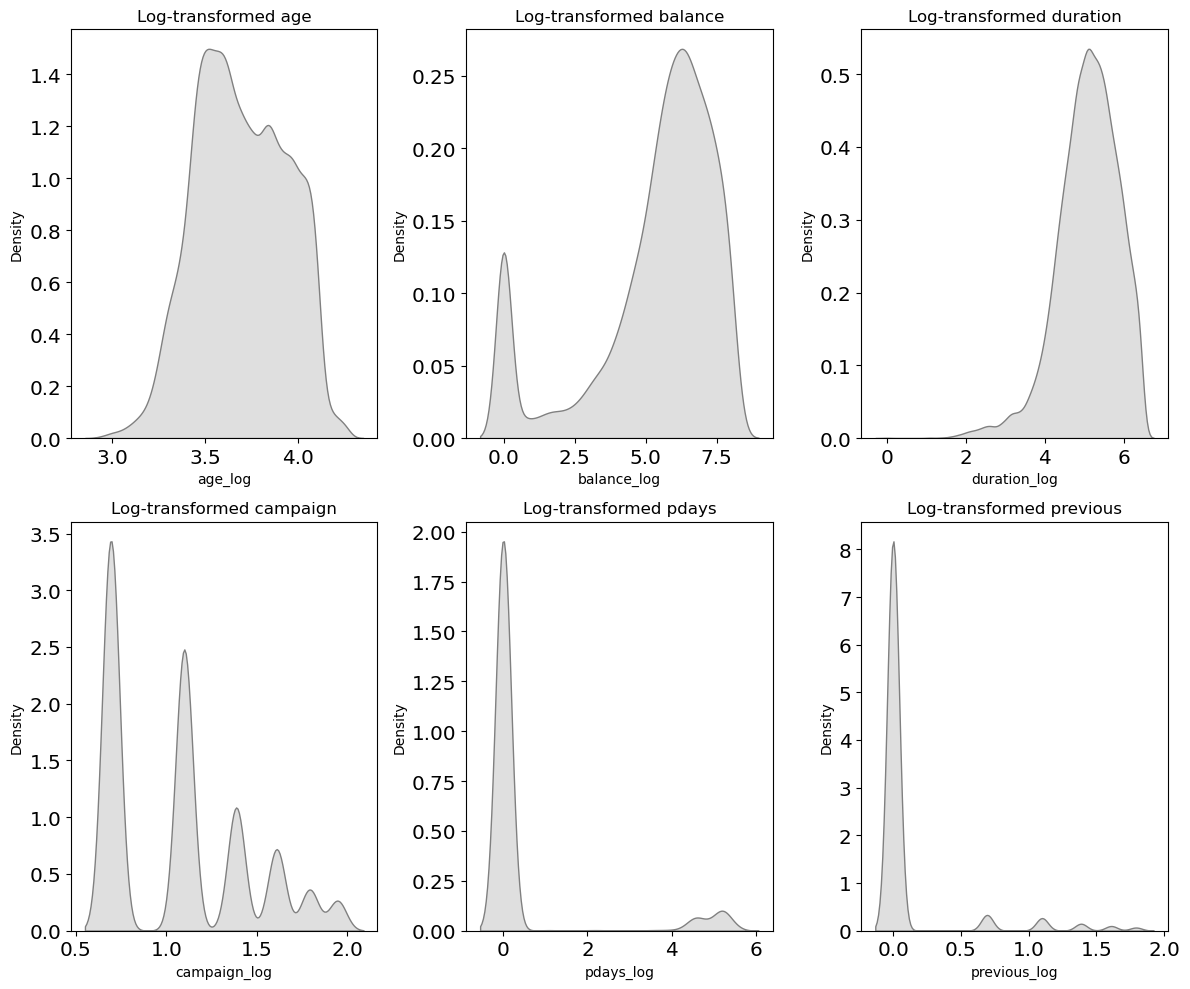

In [24]:
# Plotting
plt.figure(figsize=(12, 10))
num_columns = 3  # Menentukan jumlah kolom per baris

for i in range(len(nums)):
    plt.subplot(2, num_columns, i + 1)  # Mengatur 2 baris
    sns.kdeplot(data=data[nums[i] + '_log'], color='gray', fill=True)
    plt.title(f'Log-transformed {nums[i]}')
    plt.tight_layout()

plt.show()

In [25]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log
count,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,3.128300e+04,3.128300e+04,31283.000000,3.128300e+04,3.128300e+04
mean,40.397468,632.620784,15.739347,206.665889,2.145319,14.079948,0.219672,3.694208,5.363062e+00,5.084880e+00,1.069421,4.759527e-01,1.087217e-01
std,9.986440,842.600292,8.391785,139.326873,1.325747,46.055602,0.770525,0.241514,2.202322e+00,7.732467e-01,0.378798,1.455088e+00,3.482813e-01
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.944439,1.000000e-09,1.000000e-09,0.693147,1.000000e-09,1.000000e-09
25%,32.000000,41.000000,8.000000,102.000000,1.000000,0.000000,0.000000,3.496508,4.644391e+00,4.634729e+00,0.693147,1.000000e-09,1.000000e-09
50%,39.000000,339.000000,16.000000,170.000000,2.000000,0.000000,0.000000,3.688879,5.950643e+00,5.141664e+00,1.098612,1.000000e-09,1.000000e-09
75%,48.000000,967.000000,22.000000,279.000000,3.000000,0.000000,0.000000,3.891820,6.891118e+00,5.634790e+00,1.386294,1.000000e-09,1.000000e-09
max,70.000000,3462.000000,31.000000,643.000000,6.000000,249.000000,5.000000,4.262680,8.149891e+00,6.467699e+00,1.945910,5.521461e+00,1.791759e+00


### - Drop Column (After Feature Transformation)

In [26]:
## Drop dibawah Optional, silahkan buka bila ingin di drop
# data.drop(data[nums], axis=1, inplace=True)

### - Corelation Heatmap (After Feature Transformation)

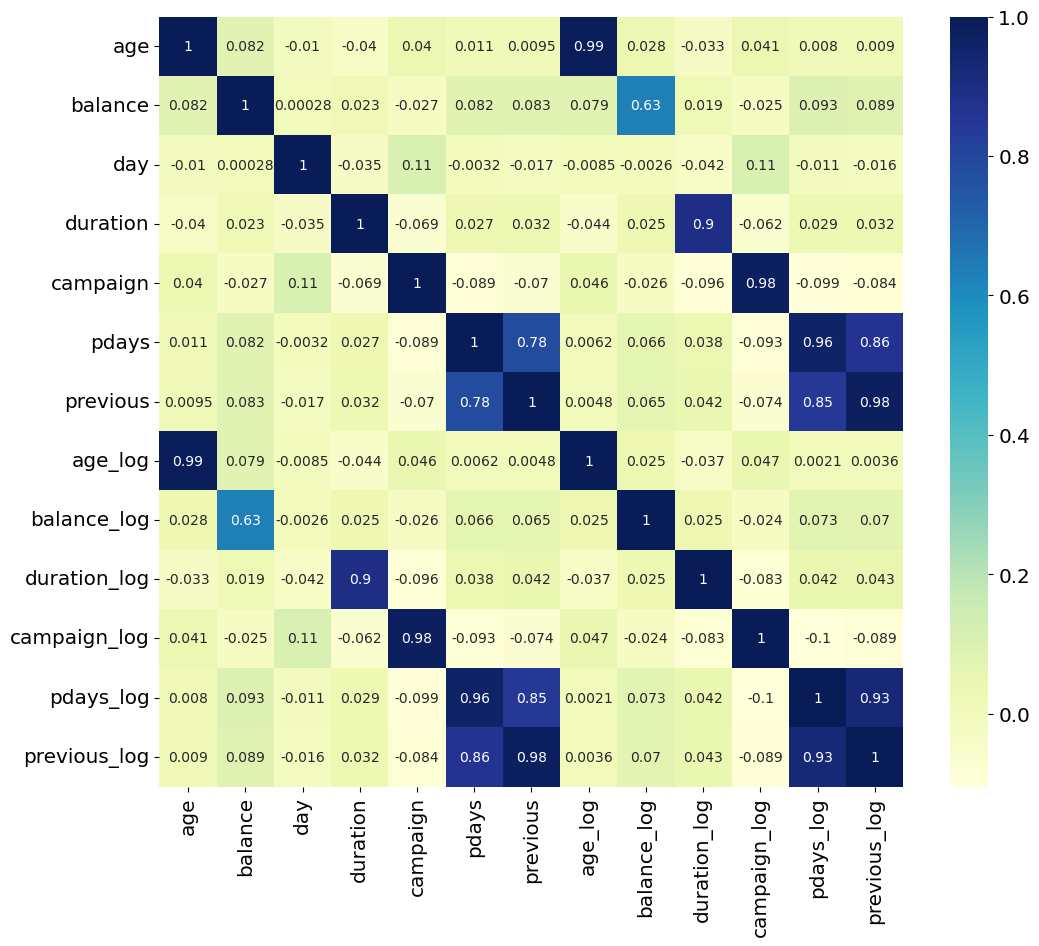

In [27]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

## e. Feature Encoding

### - Label Encoding

In [28]:
# jenis_kelamin & pendidikan
mapping_education = {
    'unknown' : 0,
    'primary' : 1,
    'secondary' : 2,
    'tertiary' : 3
}

mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

## Hasil Revisi, bila ada perubahan silahkan buka komen

mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

In [29]:
data['education'] = data['education'].map(mapping_education)
data['month'] = data['month'].map(mapping_month)

## Hasil Revisi, bila ada perubahan silahkan buka komen

data['default'] = data['default'].map(mapping_default)
data['housing'] = data['housing'].map(mapping_housing)
data['loan'] = data['loan'].map(mapping_loan)
data['y'] = data['y'].map(mapping_y)

### - One Hot Encoding

In [30]:
data = pd.get_dummies(data, columns=['job', 'marital', 'contact', 'default', 'housing',
                                     'loan','poutcome'])

In [31]:
data.sample(10)

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
32955,34,2,260,17,4,20,2,238,2,0,3.555348,5.564520e+00,3.044522,1.098612,5.476464e+00,1.098612e+00,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0
40545,34,3,783,8,7,281,1,0,0,0,3.555348,6.664409e+00,5.641907,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1
28880,34,2,243,30,1,417,4,0,0,0,3.555348,5.497168e+00,6.035481,1.609438,1.000000e-09,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
36446,27,2,297,11,5,273,5,0,0,0,3.332205,5.697093e+00,5.613128,1.791759,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1
35597,53,2,0,7,5,407,2,0,0,0,3.988984,1.000000e-09,6.011267,1.098612,1.000000e-09,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
5274,34,2,1092,23,5,268,1,0,0,0,3.555348,6.996681e+00,5.594711,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1
21876,44,3,1196,20,8,552,5,0,0,1,3.806662,7.087574e+00,6.315358,1.791759,1.000000e-09,1.000000e-09,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
11057,26,1,71,17,6,390,2,0,0,0,3.295837,4.276666e+00,5.968708,1.098612,1.000000e-09,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
41317,43,2,1612,28,8,119,2,95,3,0,3.784190,7.385851e+00,4.787492,1.098612,4.564348e+00,1.386294e+00,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
21604,58,1,0,19,8,109,6,0,0,0,4.077537,1.000000e-09,4.700480,1.945910,1.000000e-09,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1


## f. Handle class imbalance

In [32]:
# Catatan : RandomOverSampler tidak suport kepada one hot encoding
# X = data.drop(columns=['y_0', 'y_1'])
# y = data[['y_0', 'y_1']]

# Pisahkan fitur dan target
X = data.drop(columns='y')
y = data['y']

# Pembagian data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### - Oversampling (Yang akan Digunakan)

In [33]:
# Oversampling (Yang akan digunakan)
ros = RandomOverSampler(random_state=42)

# Variable [Oversampling] yang ditampung
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Random Oversampling:')
print('Sebelum oversampling:')
print(y_train.value_counts())
print('Setelah oversampling:')
print(y_over.value_counts())

Random Oversampling:
Sebelum oversampling:
0    23081
1     1945
Name: y, dtype: int64
Setelah oversampling:
0    23081
1    23081
Name: y, dtype: int64


### - Undersampling

In [34]:
# Undersampling
rus = RandomUnderSampler(random_state=42)

# Variable [Undesampling] yang ditampung
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Random Undersampling:')
print('Sebelum undersampling:')
print(y_train.value_counts())
print('Setelah undersampling:')
print(y_under.value_counts())

Random Undersampling:
Sebelum undersampling:
0    23081
1     1945
Name: y, dtype: int64
Setelah undersampling:
0    1945
1    1945
Name: y, dtype: int64


### - SMOTE

In [35]:
# SMOTE
smote = SMOTE(random_state=42)

# Variable [SMOTE] yang ditampung
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X_train, y_train)
print('SMOTE:')
print('Sebelum SMOTE:')
print(y_train.value_counts())
print('Setelah SMOTE:')
print(y_over_SMOTE.value_counts())

SMOTE:
Sebelum SMOTE:
0    23081
1     1945
Name: y, dtype: int64
Setelah SMOTE:
0    23081
1    23081
Name: y, dtype: int64


### - Handling Class imbalance Rules !

In [36]:
# Pangil variabel ini untuk (Over Samplong)
X_over, y_over

# Pangil variabel ini untuk (Under Samplong)
X_under, y_under

# Pangil variabel ini untuk (Over SMOTE)
X_over_SMOTE, y_over_SMOTE

(       age  education  balance  day  month  duration  campaign  pdays  \
 0       31          2       43   12      5       137         1      0   
 1       34          2        1    9      7       394         1      0   
 2       47          2        0   14      7        81         2      0   
 3       33          3      546    9      5       253         1      0   
 4       49          2     1120   11      5       226         2      0   
 ...    ...        ...      ...  ...    ...       ...       ...    ...   
 46157   37          3      236    5      8       140         1     94   
 46158   28          2       29    7      5       555         1      0   
 46159   34          2     2670   12      5       261         1    183   
 46160   51          2    -1111    4      2       508         1      0   
 46161   66          2        0   15      7       207         1      0   
 
        previous   age_log   balance_log  duration_log  campaign_log  \
 0             0  3.465736  3.784190e+

# Feature Engineering

## a. Feature Selection

## b. Feature Extraction

### - Fitur Kelas Usia (01)

In [37]:
#segmentasi age
def categorize_age(age):
    if 5 <= age <= 20:
        return 'usia remaja'
    elif 21 <= age <= 55:
        return 'usia produktif'
    elif 56 <= age <= 65:
        return 'usia pensiun'
    else:
        return 'pensiun' 

data['kategori_usia'] = data['age'].apply(categorize_age)

In [38]:
data

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kategori_usia
0,58,3,2143,5,5,261,1,0,0,0,4.077537,7.670429,5.568345,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,usia pensiun
1,44,2,29,5,5,151,1,0,0,0,3.806662,3.401197,5.023881,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,usia produktif
2,33,2,2,5,5,76,1,0,0,0,3.526361,1.098612,4.343805,0.693147,1.000000e-09,1.000000e-09,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,usia produktif
3,47,0,1506,5,5,92,1,0,0,0,3.871201,7.317876,4.532599,0.693147,1.000000e-09,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,usia produktif
4,33,0,1,5,5,198,1,0,0,0,3.526361,0.693147,5.293305,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,usia produktif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,3,583,17,11,226,1,184,4,1,3.988984,6.369901,5.424950,0.693147,5.220356e+00,1.609438e+00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,usia produktif
45202,34,2,557,17,11,224,1,0,0,1,3.555348,6.324359,5.416100,0.693147,1.000000e-09,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,usia produktif
45203,23,3,113,17,11,266,1,0,0,1,3.178054,4.736198,5.587249,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,usia produktif
45205,25,2,505,17,11,386,2,0,0,1,3.258097,6.226537,5.958425,1.098612,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,usia produktif


In [39]:
data['kategori_usia'].value_counts()

usia produktif    28210
usia pensiun       2818
pensiun             170
usia remaja          85
Name: kategori_usia, dtype: int64

### - Fitur Kelas Segmentasi (02)

In [40]:
# Fungsi Negative Balance
def negative_balance(balance):
    if balance <= 0:
        return 'Saldo Negatif'
    else:
        return None

# Fungsi Positif Balance    
def positive_balance(balance):
    if balance <= quantiles[0.25]:
        return 'SES - D'
    elif balance <= quantiles[0.5]:
        return 'SES - C'
    elif balance <= quantiles[0.75]:
        return 'SES - B'
    else:
        return 'SES - A'

In [41]:
# Ambil data balance yang positif
positive_balances = data[data['balance'] > 0]['balance']

# Pembagian 4 kelompok kuantil
quantiles = positive_balances.quantile([0.25, 0.5, 0.75])

In [42]:
data['kategori_pendapatan'] = data['balance'].apply(negative_balance)

# Terapkan fungsi untuk balance positif
data.loc[data['balance'] > 0, 'kategori_pendapatan'] = data[data['balance'] > 0]['balance'].apply(positive_balance)

In [43]:
data

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kategori_usia,kategori_pendapatan
0,58,3,2143,5,5,261,1,0,0,0,4.077537,7.670429,5.568345,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,usia pensiun,SES - A
1,44,2,29,5,5,151,1,0,0,0,3.806662,3.401197,5.023881,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,usia produktif,SES - D
2,33,2,2,5,5,76,1,0,0,0,3.526361,1.098612,4.343805,0.693147,1.000000e-09,1.000000e-09,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,usia produktif,SES - D
3,47,0,1506,5,5,92,1,0,0,0,3.871201,7.317876,4.532599,0.693147,1.000000e-09,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,usia produktif,SES - A
4,33,0,1,5,5,198,1,0,0,0,3.526361,0.693147,5.293305,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,usia produktif,SES - D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,3,583,17,11,226,1,184,4,1,3.988984,6.369901,5.424950,0.693147,5.220356e+00,1.609438e+00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,usia produktif,SES - B
45202,34,2,557,17,11,224,1,0,0,1,3.555348,6.324359,5.416100,0.693147,1.000000e-09,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,usia produktif,SES - B
45203,23,3,113,17,11,266,1,0,0,1,3.178054,4.736198,5.587249,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,usia produktif,SES - D
45205,25,2,505,17,11,386,2,0,0,1,3.258097,6.226537,5.958425,1.098612,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,usia produktif,SES - B


In [44]:
data['kategori_pendapatan'].value_counts()

SES - D          6405
SES - C          6400
SES - B          6400
SES - A          6397
Saldo Negatif    5681
Name: kategori_pendapatan, dtype: int64

### - Fitur Generasi (03)

In [45]:
tahun_sekarang = datetime.now().year
data['tahun_lahir'] = tahun_sekarang - data['age']

In [46]:
def determine_generation(year_of_birth):
    if 1918 <= year_of_birth <= 1945:
        return 'Pre Boomers'
    elif 1946 <= year_of_birth <= 1964:
        return 'Baby Boomers'
    elif 1965 <= year_of_birth <= 1980:
        return 'Gen X'
    elif 1981 <= year_of_birth <= 1996:
        return 'Millennials (Gen Y)'
    elif 1997 <= year_of_birth <= 2012:
        return 'Gen Z'
    elif year_of_birth > 2012:
        return 'Gen Alpha'
    else:
        return 'Unknown'

# apply kolom 'generasi' ke dataset
data['generasi'] = data['tahun_lahir'].apply(determine_generation)

## c. Kesimpulan Feature Engineering

In [47]:
data

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kategori_usia,kategori_pendapatan,tahun_lahir,generasi
0,58,3,2143,5,5,261,1,0,0,0,4.077537,7.670429,5.568345,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,usia pensiun,SES - A,1966,Gen X
1,44,2,29,5,5,151,1,0,0,0,3.806662,3.401197,5.023881,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,usia produktif,SES - D,1980,Gen X
2,33,2,2,5,5,76,1,0,0,0,3.526361,1.098612,4.343805,0.693147,1.000000e-09,1.000000e-09,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,usia produktif,SES - D,1991,Millennials (Gen Y)
3,47,0,1506,5,5,92,1,0,0,0,3.871201,7.317876,4.532599,0.693147,1.000000e-09,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,usia produktif,SES - A,1977,Gen X
4,33,0,1,5,5,198,1,0,0,0,3.526361,0.693147,5.293305,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,usia produktif,SES - D,1991,Millennials (Gen Y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,3,583,17,11,226,1,184,4,1,3.988984,6.369901,5.424950,0.693147,5.220356e+00,1.609438e+00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,usia produktif,SES - B,1971,Gen X
45202,34,2,557,17,11,224,1,0,0,1,3.555348,6.324359,5.416100,0.693147,1.000000e-09,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,usia produktif,SES - B,1990,Millennials (Gen Y)
45203,23,3,113,17,11,266,1,0,0,1,3.178054,4.736198,5.587249,0.693147,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,usia produktif,SES - D,2001,Gen Z
45205,25,2,505,17,11,386,2,0,0,1,3.258097,6.226537,5.958425,1.098612,1.000000e-09,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,usia produktif,SES - B,1999,Gen Z


# Business Insight (Before Modeling)

In [48]:
data_yes = data[data['y'] == 1]

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31283 entries, 0 to 45209
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31283 non-null  int64  
 1   education            31283 non-null  int64  
 2   balance              31283 non-null  int64  
 3   day                  31283 non-null  int64  
 4   month                31283 non-null  int64  
 5   duration             31283 non-null  int64  
 6   campaign             31283 non-null  int64  
 7   pdays                31283 non-null  int64  
 8   previous             31283 non-null  int64  
 9   y                    31283 non-null  int64  
 10  age_log              31283 non-null  float64
 11  balance_log          31283 non-null  float64
 12  duration_log         31283 non-null  float64
 13  campaign_log         31283 non-null  float64
 14  pdays_log            31283 non-null  float64
 15  previous_log         31283 non-null 

### - Durasi Kontak Terakhir 'duration_minutes'

In [50]:
data['duration_minutes'] = data['duration'] / 60

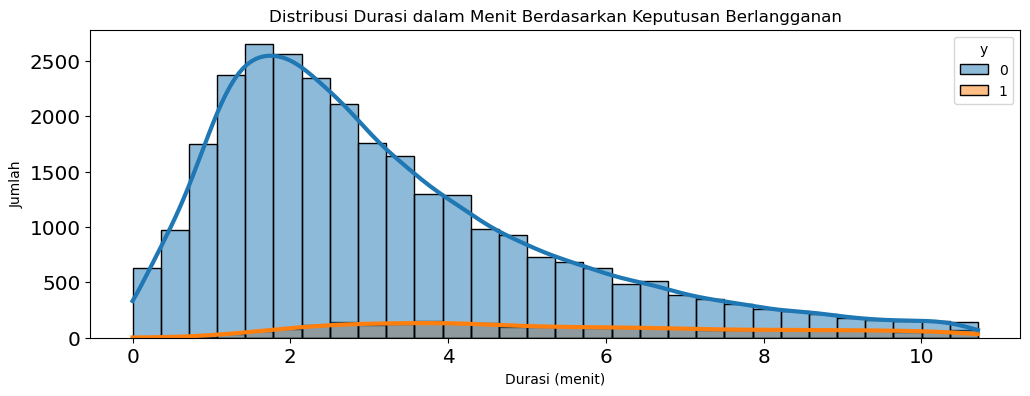

In [51]:
sns.histplot(data=data, x='duration_minutes', hue='y', kde=True, bins=30)
plt.title('Distribusi Durasi dalam Menit Berdasarkan Keputusan Berlangganan')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah')
plt.show()

### - Analisis 'kategori_usia'

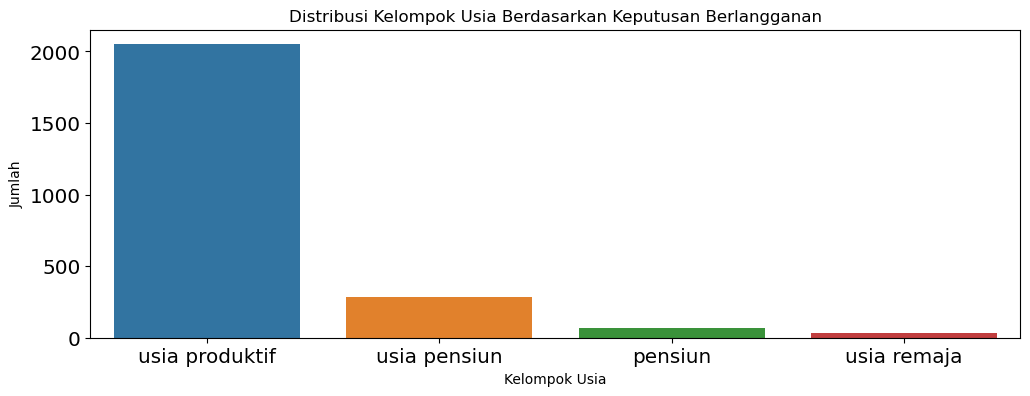

In [52]:
sns.countplot(data=data_yes, x='kategori_usia')
plt.title('Distribusi Kelompok Usia Berdasarkan Keputusan Berlangganan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.show()

### - Analisis 'kategori_pendapatan'

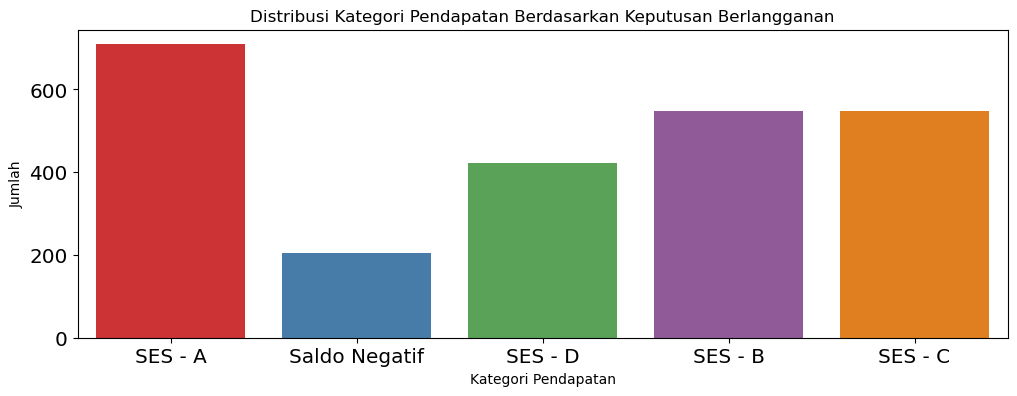

In [53]:
sns.countplot(data=data_yes, x='kategori_pendapatan', palette='Set1')
plt.title('Distribusi Kategori Pendapatan Berdasarkan Keputusan Berlangganan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Jumlah')
plt.show()

In [54]:
data_yes['kategori_pendapatan'].value_counts()

SES - A          709
SES - B          548
SES - C          547
SES - D          423
Saldo Negatif    204
Name: kategori_pendapatan, dtype: int64

### - Analisis 'generasi'

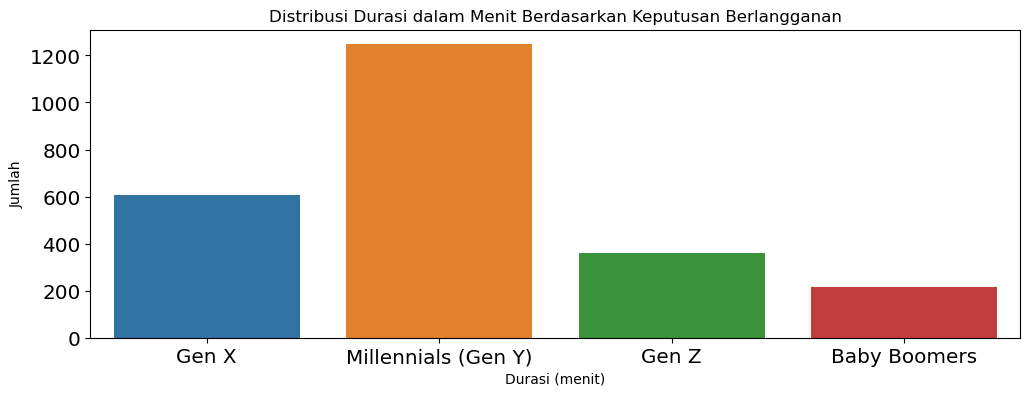

In [55]:
sns.countplot(data=data_yes, x='generasi')
plt.title('Distribusi Durasi dalam Menit Berdasarkan Keputusan Berlangganan')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah')
plt.show()

In [56]:
data_yes['generasi'].value_counts()

Millennials (Gen Y)    1247
Gen X                   607
Gen Z                   360
Baby Boomers            217
Name: generasi, dtype: int64

# SAVE FILE

In [57]:
## Buka Komen apabila ingin simpan hasilnya

# data.to_excel('output_sementara.xlsx', index=False)